In [1]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

## Fake data generation

In [2]:
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)  # shape=(100,2)  class0  mean 2 and std 1
y0 = torch.zeros(100)          # shape=(100,1)
x1 = torch.normal(-2*n_data,1) # shape=(100,1)  class1
y1 = torch.ones(100)           # shape=(100,1)
x = torch.cat((x0,x1),0).type(torch.FloatTensor)  # FloatTensor : 32-bit float
y = torch.cat((y0,y1),).type(torch.LongTensor)    # LongTensor  : 64-bit integer 

In [3]:
x.size()

torch.Size([200, 2])

In [4]:
y.size()

torch.Size([200])

## Network construction

In [5]:
x,y = Variable(x),Variable(y)

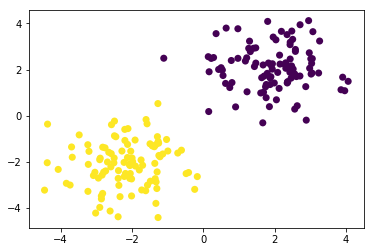

In [6]:
plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=y.data.numpy(),s=50,lw=0)

In [7]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self,x):
        x = torch.relu(self.hidden(x))
        x = self.out(x)
        return x

In [8]:
net = Net(2,10,2)

In [9]:
net

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)

In [10]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.01)
loss_func = torch.nn.CrossEntropyLoss()

## Training

/home/zyzn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


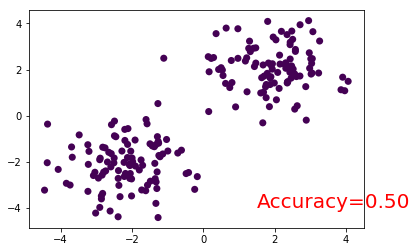

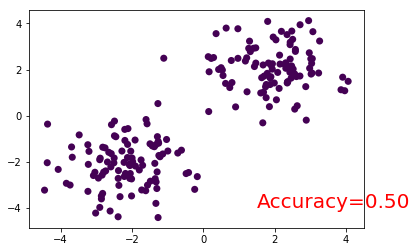

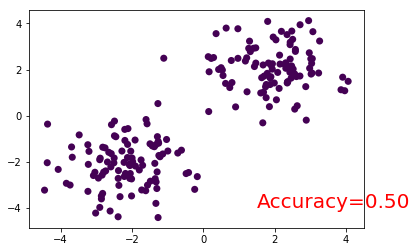

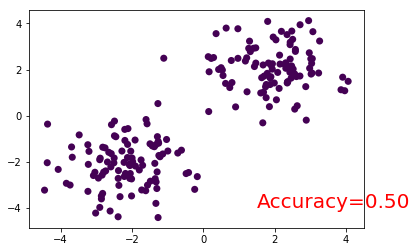

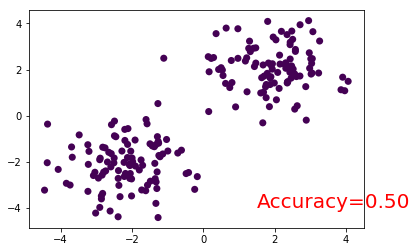

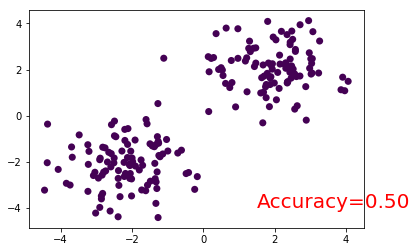

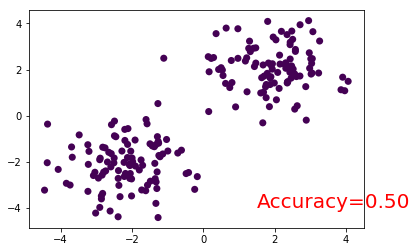

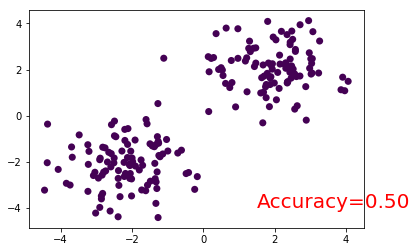

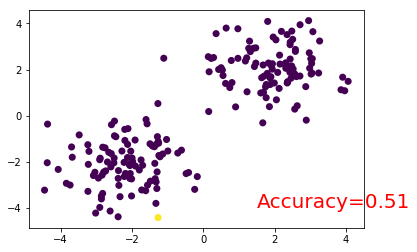

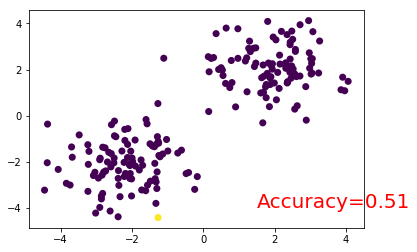

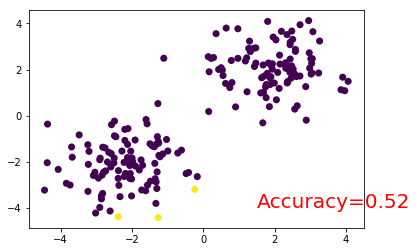

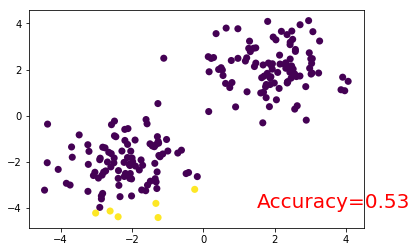

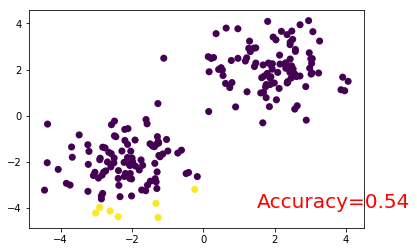

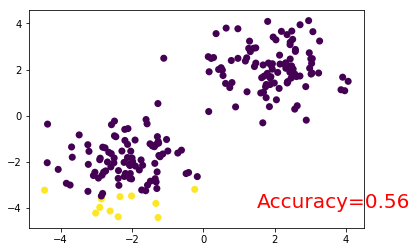

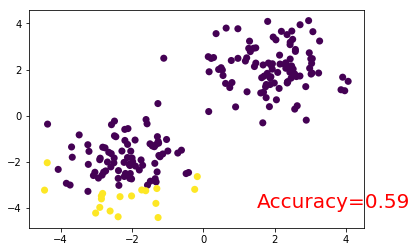

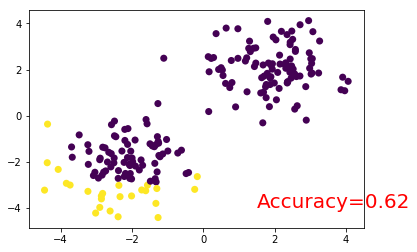

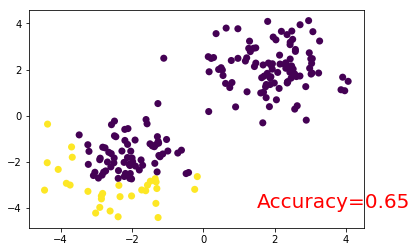

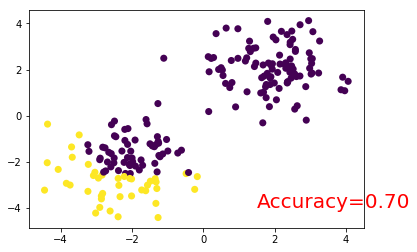

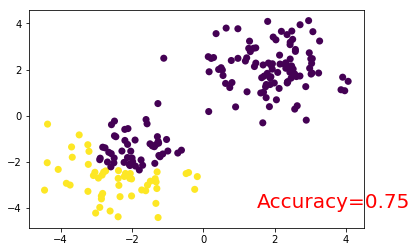

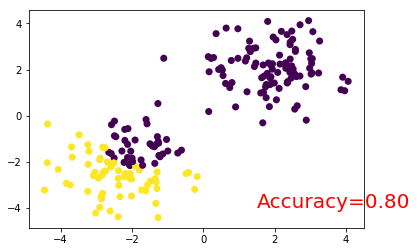

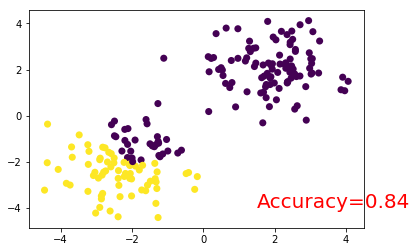

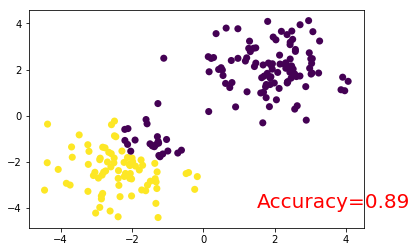

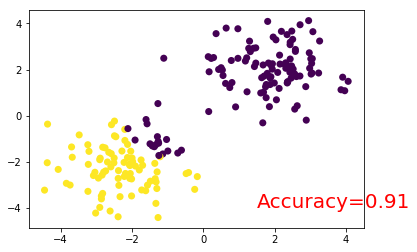

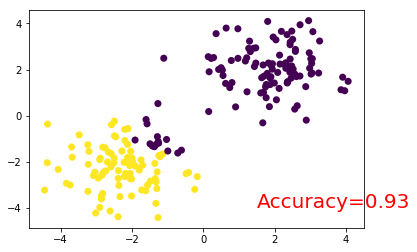

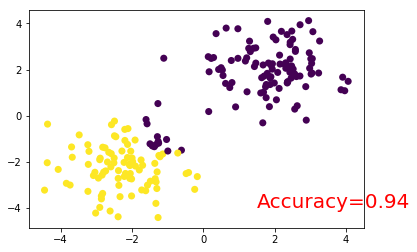

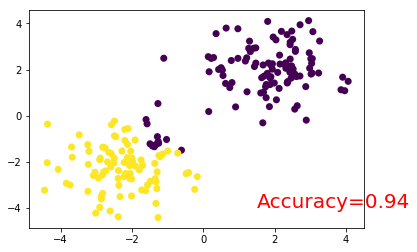

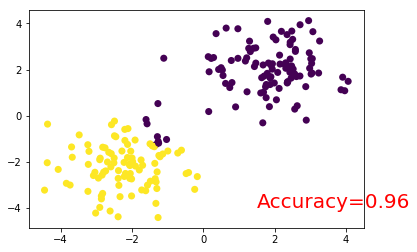

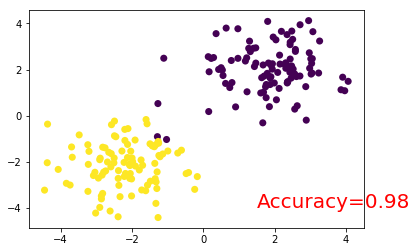

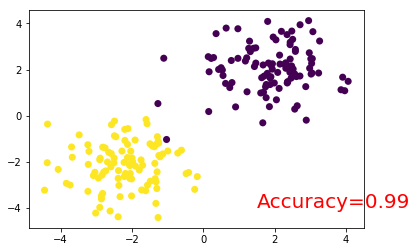

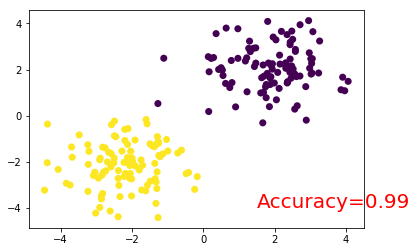

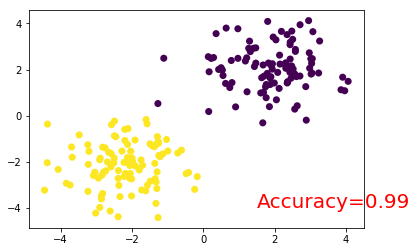

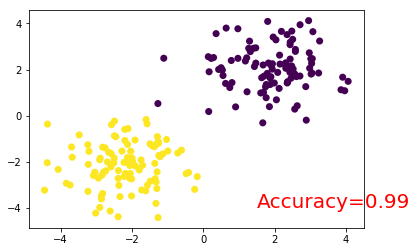

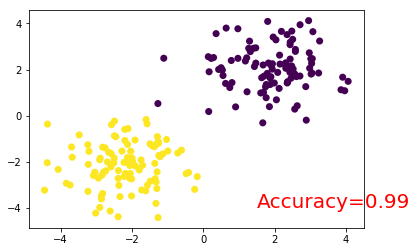

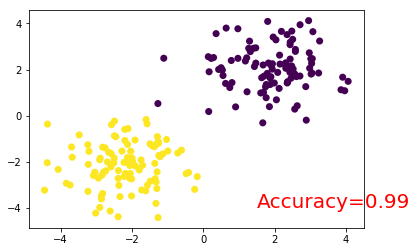

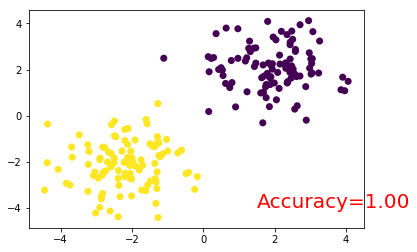

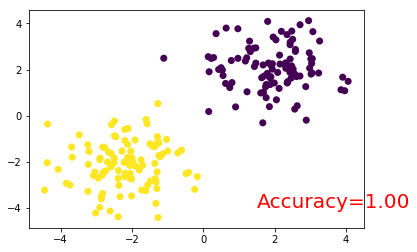

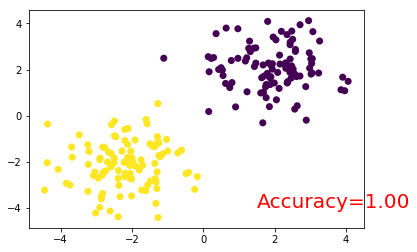

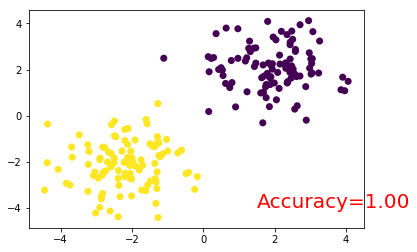

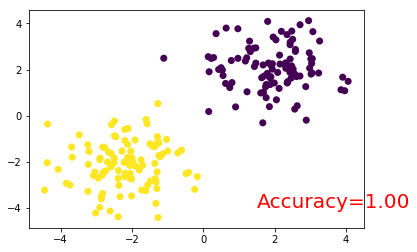

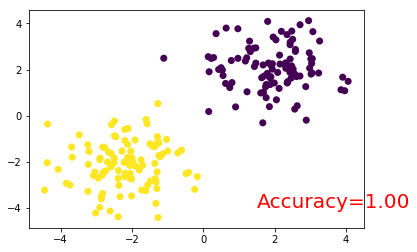

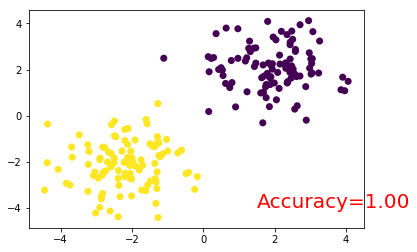

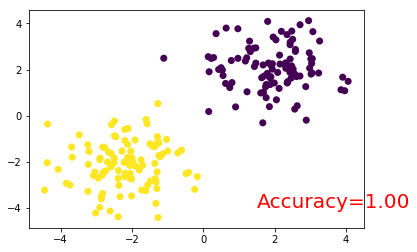

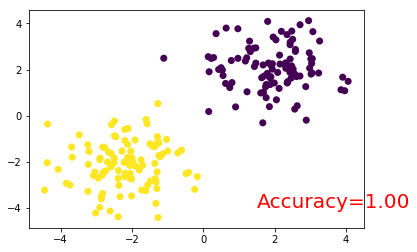

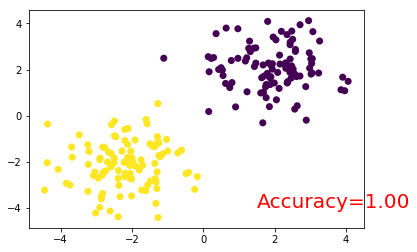

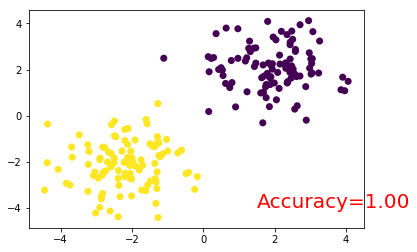

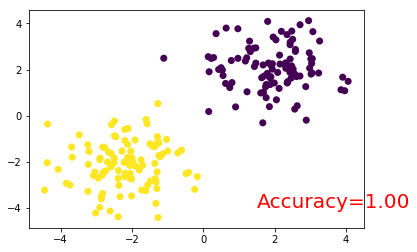

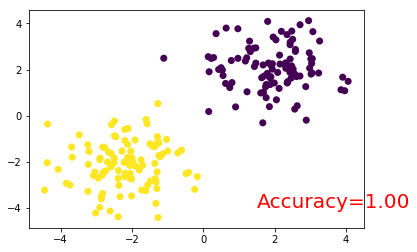

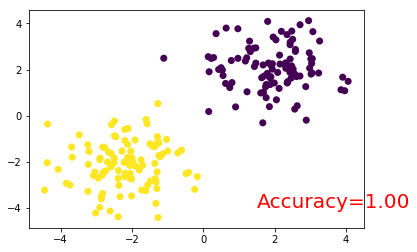

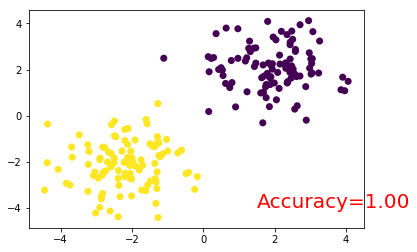

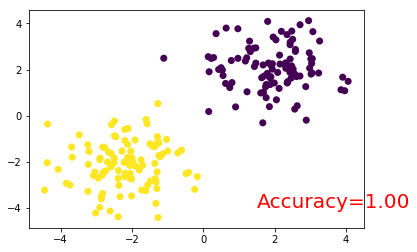

In [11]:
import torch.nn.functional as F

plt.ion() # plot all the time
for t in range(100):
    out = net(x)
    loss = loss_func(out,y)
    optimizer.zero_grad() # initialize grad with zero
    loss.backward()
    optimizer.step()  # optimize the weight
    
    if t%2 == 0:
        plt.cla()
        prediction = torch.max(F.softmax(out),1)[1]   # [0]: max values [1]: indices
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=pred_y,s=50,lw=0)
        accuracy = sum(pred_y == target_y) / 200
        plt.text(1.5,-4,'Accuracy=%.2f'%accuracy,fontdict={'size':20,'color':'red'})
        plt.pause(0.1)
        
plt.ioff()

## Use Sequential

In [12]:
import torch

net2 = torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),  # class (layer)
    torch.nn.Linear(10,2)
)

In [13]:
net2

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)